In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
example_file = "gdrive/My Drive/Face Markup AR Database/Face Markup AR Database/points_22/m-001/m-001-01.pts"

#example_file = "gdrive/My Drive/Face_AR/points_22/m-001/m-001-01.pts"

In [ ]:
#example_file = "Face Markup AR Database/points_22/m-001/m-001-01.pts"

In [4]:
coords = np.loadtxt(example_file, skiprows=3, delimiter=" ", max_rows=22)

In [5]:
coords

array([[328.444, 275.496],
       [434.921, 275.029],
       [331.713, 401.121],
       [427.449, 400.187],
       [271.936, 270.826],
       [356.464, 254.014],
       [388.221, 255.882],
       [494.698, 268.491],
       [263.997, 274.095],
       [301.825, 277.831],
       [349.459, 277.364],
       [411.104, 278.298],
       [459.673, 277.831],
       [515.246, 276.897],
       [368.606, 340.41 ],
       [355.53 , 351.151],
       [391.957, 350.217],
       [374.253, 395.527],
       [374.253, 416.925],
       [373.276, 483.314],
       [280.342, 404.39 ],
       [499.835, 402.522]])

In [6]:
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

In [13]:
def eye_length_ratio(coords):
    d_left = distance(coords[9], coords[10])
    d_right = distance(coords[11], coords[12])
    d_ref = distance(coords[8], coords[13])
    return np.max([d_left / d_ref, d_right / d_ref])

In [12]:
def eye_distance_ratio(coords):
    d_center = distance(coords[0], coords[1])
    d_ref = distance(coords[8], coords[13])
    return d_center / d_ref

In [14]:
eye_length_ratio(coords)

0.19330713710291383

In [ ]:
# 76 Male faces
male_dict = {}
expressions = {"neutral": "01", "smiling": "02", "anger": "03", "left_light": "05"}

for expression in expressions.keys():
    male_dict[f"{expression}_eye_length_ratio"] = []
    male_dict[f"{expression}_eye_distance_ratio"] = []
    # add other features here
    # male_dict[f"{expression}_{other_feaure}] = []
for i in range(1, 77):
    # basepath = "gdrive/My Drive/Face Markup AR Database/Face Markup AR Database/points_22/"
    basepath = "gdrive/My Drive/Face_AR/points_22/"
    for expression, expression_num in expressions.items():
        filenum = str(i).rjust(3, "0")
        filepath = basepath + f"m-{filenum}/m-{filenum}-{expression_num}.pts"
        try:
            coords = np.loadtxt(filepath, skiprows=3, delimiter=" ", max_rows=22)
            male_dict[f"{expression}_eye_length_ratio"].append(eye_length_ratio(coords))
            # Populate other_feature lists here
            male_dict[f"{expression}_eye_distance_ratio"].append(eye_distance_ratio(coords))
        except:
            print("File not found!")
            print(filepath)
            male_dict[f"{expression}_eye_length_ratio"].append(np.nan)
            male_dict[f"{expression}_eye_distance_ratio"].append(np.nan)
            print()

        

In [16]:
def nose_distance_ratio(coords):
    d_center = distance(coords[15], coords[16])
    d_ref = distance(coords[20], coords[21])
    return d_center / d_ref

def lip_size_ratio(coords):
    d_center = distance(coords[2], coords[3])
    d_ref = distance(coords[17], coords[18])
    return d_center / d_ref


def lip_length_ratio(coords):
    d_center = distance(coords[2], coords[3])
    d_ref = distance(coords[20], coords[21])
    return d_center / d_ref


def eye_brown_length_ratio(coords):
    d_center = distance(coords[4], coords[5])
    d_ref = distance(coords[8], coords[13])
    return d_center / d_ref


def aggresive_ratio(coords):
    d_center = distance(coords[10], coords[19])
    d_ref = distance(coords[20], coords[21])
    return d_center / d_ref

In [ ]:
# 76 Male faces
male_dict = {}
expressions = {"neutral": "01", "smiling": "02", "anger": "03", "left_light": "05"}

for expression in expressions.keys():
    male_dict[f"eye_length_ratio"] = []
    male_dict[f"eye_distance_ratio"] = []
    male_dict[f"nose_distance_ratio"] = []
    male_dict[f"lip_size_ratio"] = []
    male_dict[f"lip_length_ratio"] = []
    male_dict[f"eye_brown_length_ratio"] = []
    male_dict[f"aggresive_ratio"] = []
    male_dict[f"label"] = []
    male_dict[f"gender"] = []
    male_dict[f"expression"] = []

    # male_dict[f"{expression}_{other_feaure}] = []
person_id=0
for i in range(1, 77):
    basepath = "gdrive/My Drive/Face Markup AR Database/Face Markup AR Database/points_22/"
    #basepath = "gdrive/My Drive/Face_AR/points_22/"
    for expression, expression_num in expressions.items():
        filenum = str(i).rjust(3, "0")
        filepath = basepath + f"m-{filenum}/m-{filenum}-{expression_num}.pts"
        try:
            coords = np.loadtxt(filepath, skiprows=3, delimiter=" ", max_rows=22)
            male_dict[f"eye_length_ratio"].append(eye_length_ratio(coords))
            male_dict[f"eye_distance_ratio"].append(eye_distance_ratio(coords))
            male_dict[f"nose_distance_ratio"].append(nose_distance_ratio(coords))
            male_dict[f"lip_size_ratio"].append(lip_size_ratio(coords))
            male_dict[f"lip_length_ratio"].append(lip_length_ratio(coords))
            male_dict[f"eye_brown_length_ratio"].append(eye_brown_length_ratio(coords))
            male_dict[f"aggresive_ratio"].append(eye_brown_length_ratio(coords))

        except:
            print("File not found!")
            print(filepath)
            male_dict[f"eye_length_ratio"].append(np.nan)
            male_dict[f"eye_distance_ratio"].append(np.nan)
            male_dict[f"nose_distance_ratio"].append(np.nan)
            male_dict[f"lip_size_ratio"].append(np.nan)
            male_dict[f"lip_length_ratio"].append(np.nan)
            male_dict[f"eye_brown_length_ratio"].append(np.nan)
            male_dict[f"aggresive_ratio"].append(np.nan)
            print()

        male_dict[f"label"].append(person_id)
        male_dict[f"gender"].append('male')
        male_dict[f"expression"].append(expression)
    person_id+=1


for i in range(1, 61):
    basepath = "gdrive/My Drive/Face Markup AR Database/Face Markup AR Database/points_22/"
    #basepath = "gdrive/My Drive/Face_AR/points_22/"
    for expression, expression_num in expressions.items():
        filenum = str(i).rjust(3, "0")
        filepath = basepath + f"w-{filenum}/w-{filenum}-{expression_num}.pts"
        try:
            coords = np.loadtxt(filepath, skiprows=3, delimiter=" ", max_rows=22)
            male_dict[f"eye_length_ratio"].append(eye_length_ratio(coords))
            male_dict[f"eye_distance_ratio"].append(eye_distance_ratio(coords))
            male_dict[f"nose_distance_ratio"].append(nose_distance_ratio(coords))
            male_dict[f"lip_size_ratio"].append(lip_size_ratio(coords))
            male_dict[f"lip_length_ratio"].append(lip_length_ratio(coords))
            male_dict[f"eye_brown_length_ratio"].append(eye_brown_length_ratio(coords))
            male_dict[f"aggresive_ratio"].append(eye_brown_length_ratio(coords))

        except:
            print("File not found!")
            print(filepath)
            male_dict[f"eye_length_ratio"].append(np.nan)
            male_dict[f"eye_distance_ratio"].append(np.nan)
            male_dict[f"nose_distance_ratio"].append(np.nan)
            male_dict[f"lip_size_ratio"].append(np.nan)
            male_dict[f"lip_length_ratio"].append(np.nan)
            male_dict[f"eye_brown_length_ratio"].append(np.nan)
            male_dict[f"aggresive_ratio"].append(np.nan)
            print()

        male_dict[f"label"].append(person_id)
        male_dict[f"gender"].append('female')
        male_dict[f"expression"].append(expression)

    person_id+=1

In [18]:
df = pd.DataFrame(male_dict)
df

,eye_length_ratio,eye_distance_ratio,nose_distance_ratio,lip_size_ratio,lip_length_ratio,eye_brown_length_ratio,aggresive_ratio,label,gender,expression
0,0.193307,0.423768,0.166008,4.474276,0.436174,0.343000,0.343000,0,male,neutral
1,0.211407,0.428316,0.147227,3.392057,0.469056,0.384807,0.384807,0,male,smiling
2,0.224320,0.434374,0.155068,3.887081,0.456299,0.365402,0.365402,0,male,anger
3,0.183316,0.445299,0.162857,3.382285,0.398878,0.389863,0.389863,0,male,left_light
4,0.208663,0.480300,0.135395,3.287606,0.412910,0.360354,0.360354,1,male,neutral
...,...,...,...,...,...,...,...,...,...,...
539,0.188762,0.510080,0.157231,3.058341,0.390938,0.406511,0.406511,134,female,left_light
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,female,neutral
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,female,smiling
542,0.225156,0.446421,0.179555,3.716731,0.491543,0.326078,0.326078,135,female,anger


In [19]:
df.isnull().sum()

eye_length_ratio          40
eye_distance_ratio        40
nose_distance_ratio       40
lip_size_ratio            40
lip_length_ratio          40
eye_brown_length_ratio    40
aggresive_ratio           40
label                      0
gender                     0
expression                 0
dtype: int64

In [20]:
df_red=df.dropna()

In [21]:
df_red.isnull().sum()

eye_length_ratio          0
eye_distance_ratio        0
nose_distance_ratio       0
lip_size_ratio            0
lip_length_ratio          0
eye_brown_length_ratio    0
aggresive_ratio           0
label                     0
gender                    0
expression                0
dtype: int64

# Classification Person KNN


### Prepare for training


In [22]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['label']

### Train model

In [23]:
y.nunique()

134

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred=model.predict(X_test)
y_pred

array([ 9, 12, 20,  1, 22,  0, 82, 29, 14,  5, 35,  9, 15,  8, 49,  4,  4,
       78, 16,  6, 12,  4, 12, 10,  7, 12,  7, 82, 31, 29, 62, 23, 31, 44,
       15,  7,  3, 51, 21, 14, 82, 33,  3,  9, 35, 55, 10, 50,  7, 10, 21,
        0,  2,  8, 14, 15,  4, 16, 83, 21, 36, 16,  6, 12, 56, 14, 31, 26,
        3,  9,  0, 14, 10,  3, 24, 17, 43, 49, 10, 12,  3, 29,  7,  6, 31,
       27,  2, 16,  8,  6, 11, 12,  5, 17, 28,  6,  1, 36, 16,  6, 24])

In [41]:
y_test.values

array([ 23,  25, 122,  88, 101,   3,  82, 107,  41,  39, 111,  64,  65,
        56,  44,  76, 128,  50,  40,   9,  53,  99, 118,  28,  11, 103,
         5,  96,  25,  60, 100,  30,  32, 134,  52,  93,  80, 116,  68,
        49,  82,  11, 104,  57,  20,   0, 117,  90, 108,  26,  94,  44,
        56,  37,  34,   3,  85,  44,  94,  72,  20,  71, 100, 110,  77,
        62,   2, 104, 111,  19,  37,  16,  88,  87,  45,  59, 121,  26,
       131,  54,  77,  61,  56,  97,  83,  85, 109,  40,  79,  13,  98,
       104,  78, 116,  46, 106,  14, 114,  15, 131,  27])

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [43]:
accuracy_score(y_test,y_pred)

0.019801980198019802

In [44]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

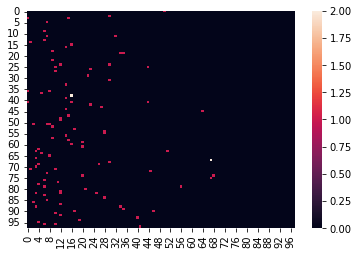

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [49]:
recall_score(y_test,y_pred,average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.01020408163265306

In [ ]:
precision_score(y_test,y_pred,average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.006802721088435374

# Classification Expression KNN


In [77]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['expression']

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
# GridSearchCV, RandomizedSearchCV

In [79]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [80]:
y_pred=model.predict(X_test)
y_pred

array(['anger', 'smiling', 'anger', 'anger', 'smiling', 'anger',
       'smiling', 'anger', 'smiling', 'left_light', 'left_light',
       'left_light', 'anger', 'smiling', 'left_light', 'smiling', 'anger',
       'neutral', 'neutral', 'smiling', 'left_light', 'smiling', 'anger',
       'left_light', 'smiling', 'anger', 'neutral', 'smiling', 'neutral',
       'anger', 'neutral', 'neutral', 'anger', 'neutral', 'left_light',
       'smiling', 'smiling', 'smiling', 'smiling', 'smiling', 'smiling',
       'left_light', 'left_light', 'left_light', 'neutral', 'anger',
       'left_light', 'smiling', 'smiling', 'anger', 'anger', 'neutral',
       'neutral', 'left_light', 'anger', 'anger', 'anger', 'left_light',
       'neutral', 'neutral', 'neutral', 'anger', 'left_light', 'smiling',
       'neutral', 'smiling', 'anger', 'left_light', 'anger', 'left_light',
       'neutral', 'left_light', 'left_light', 'anger', 'smiling',
       'left_light', 'anger', 'smiling', 'left_light', 'neutral', 'anger

In [81]:
y_test.values

array(['anger', 'smiling', 'anger', 'neutral', 'left_light', 'left_light',
       'anger', 'neutral', 'smiling', 'left_light', 'left_light',
       'left_light', 'neutral', 'smiling', 'smiling', 'anger', 'anger',
       'neutral', 'neutral', 'smiling', 'anger', 'smiling', 'anger',
       'neutral', 'smiling', 'anger', 'smiling', 'left_light', 'neutral',
       'anger', 'left_light', 'anger', 'neutral', 'anger', 'left_light',
       'anger', 'smiling', 'smiling', 'anger', 'smiling', 'left_light',
       'anger', 'anger', 'anger', 'neutral', 'smiling', 'smiling',
       'left_light', 'smiling', 'anger', 'anger', 'neutral', 'anger',
       'anger', 'anger', 'neutral', 'anger', 'left_light', 'smiling',
       'neutral', 'anger', 'neutral', 'anger', 'smiling', 'left_light',
       'left_light', 'anger', 'left_light', 'anger', 'left_light',
       'neutral', 'smiling', 'left_light', 'neutral', 'smiling',
       'neutral', 'smiling', 'neutral', 'left_light', 'neutral', 'anger',
       'neutra

In [82]:
accuracy_score(y_test,y_pred)

0.5148514851485149

In [83]:
y_test.value_counts()

anger         32
smiling       24
neutral       23
left_light    22
Name: expression, dtype: int64

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.52      0.47      0.49        32
  left_light       0.44      0.50      0.47        22
     neutral       0.53      0.43      0.48        23
     smiling       0.57      0.67      0.62        24

    accuracy                           0.51       101
   macro avg       0.51      0.52      0.51       101
weighted avg       0.52      0.51      0.51       101



In [85]:
confusion_matrix(y_test,y_pred)

array([[15,  9,  4,  4],
       [ 1, 11,  3,  7],
       [10,  2, 10,  1],
       [ 3,  3,  2, 16]])

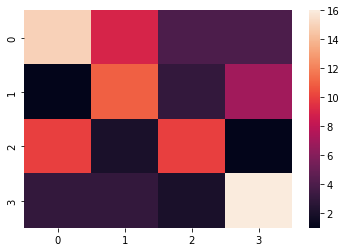

In [87]:
sns.heatmap(confusion_matrix(y_test,y_pred))

In [ ]:
## Only on Anger:
# TP: 12, number of samples that are anger and the model predicted as anger
# TN: 15+10+12 = 37 number of samples that are not anger and the model predicted as not anger
# FP: 9+12+3 = 24  number of samples that are not anger but the model predicted as anger
# FN  4+1+4 = 9 number of samples that are anger but the model predicted as not anger

# Classification Gender KNN


In [88]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['gender']

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
# GridSearchCV, RandomizedSearchCV

In [90]:
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [91]:
y_pred=model.predict(X_test)
y_pred

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'male', 'male', 'female', 'female', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male'], dtype=object)

In [92]:
y_test.values

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'male', 'female',
       '

In [93]:
accuracy_score(y_test,y_pred)

0.6732673267326733

In [94]:
y_pred

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'male', 'male', 'female', 'female', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male'], dtype=object)

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       0.73      0.47      0.57        47
        male       0.65      0.85      0.74        54

    accuracy                           0.67       101
   macro avg       0.69      0.66      0.65       101
weighted avg       0.69      0.67      0.66       101



In [96]:
y_test.value_counts()

male      54
female    47
Name: gender, dtype: int64

In [97]:
confusion_matrix(y_test,y_pred)

array([[22, 25],
       [ 8, 46]])

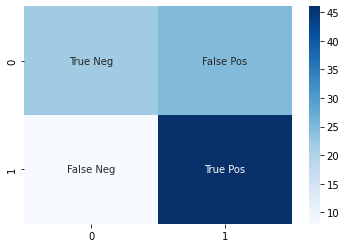

In [98]:
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=labels, fmt='', cmap='Blues')


# Naive Bayes Person Identifier

In [99]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['label']

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [101]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [102]:
y_pred=model.predict(X_test)
y_pred

array([  1,  71, 114,  21, 105,   8,  78,  21,  83,  67, 112,   1,  35,
        43,  83,   6,   2,  83,  69,  92,  42,  30,  21, 111,  68,  21,
         7, 123,  66,  78, 125,  17,  73,  47, 126,  93,  29,  73,  89,
        93,  13,  49, 105, 110,  15,  10, 117,  60, 113,  74,  21,  47,
        70,  67,   2,   4,  63,  69, 115,  36,  14,  87, 120,  27, 119,
       112,  29, 105,  61,  38,  86, 114,  71, 115,  74,  54,  86,  74,
         7,  66,  61,  35,   7,  59,  29,  83,  96,  48,  68,  13,  91,
       105,  78,  50,  43,   3,  35,  36,  42,  14,  97])

In [103]:
y_test.values

array([ 23,  25, 122,  88, 101,   3,  82, 107,  41,  39, 111,  64,  65,
        56,  44,  76, 128,  50,  40,   9,  53,  99, 118,  28,  11, 103,
         5,  96,  25,  60, 100,  30,  32, 134,  52,  93,  80, 116,  68,
        49,  82,  11, 104,  57,  20,   0, 117,  90, 108,  26,  94,  44,
        56,  37,  34,   3,  85,  44,  94,  72,  20,  71, 100, 110,  77,
        62,   2, 104, 111,  19,  37,  16,  88,  87,  45,  59, 121,  26,
       131,  54,  77,  61,  56,  97,  83,  85, 109,  40,  79,  13,  98,
       104,  78, 116,  46, 106,  14, 114,  15, 131,  27])

In [104]:
accuracy_score(y_test,y_pred)

0.039603960396039604

In [105]:
y_pred

array([  1,  71, 114,  21, 105,   8,  78,  21,  83,  67, 112,   1,  35,
        43,  83,   6,   2,  83,  69,  92,  42,  30,  21, 111,  68,  21,
         7, 123,  66,  78, 125,  17,  73,  47, 126,  93,  29,  73,  89,
        93,  13,  49, 105, 110,  15,  10, 117,  60, 113,  74,  21,  47,
        70,  67,   2,   4,  63,  69, 115,  36,  14,  87, 120,  27, 119,
       112,  29, 105,  61,  38,  86, 114,  71, 115,  74,  54,  86,  74,
         7,  66,  61,  35,   7,  59,  29,  83,  96,  48,  68,  13,  91,
       105,  78,  50,  43,   3,  35,  36,  42,  14,  97])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [107]:
y_test.value_counts()

104    3
44     3
56     3
37     2
20     2
      ..
49     1
57     1
0      1
117    1
27     1
Name: label, Length: 79, dtype: int64

In [108]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

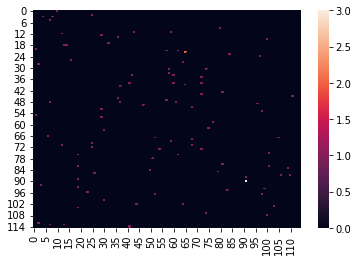

In [109]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Naive Bayes Expression

In [111]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['expression']

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [113]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [114]:
y_pred=model.predict(X_test)
y_pred

array(['neutral', 'smiling', 'neutral', 'neutral', 'smiling',
       'left_light', 'anger', 'neutral', 'smiling', 'left_light',
       'left_light', 'anger', 'neutral', 'smiling', 'left_light', 'anger',
       'anger', 'left_light', 'neutral', 'smiling', 'anger', 'smiling',
       'neutral', 'neutral', 'smiling', 'neutral', 'anger', 'left_light',
       'neutral', 'anger', 'left_light', 'neutral', 'neutral', 'anger',
       'left_light', 'anger', 'smiling', 'smiling', 'smiling', 'smiling',
       'left_light', 'anger', 'smiling', 'left_light', 'neutral',
       'left_light', 'left_light', 'left_light', 'smiling', 'anger',
       'neutral', 'neutral', 'anger', 'left_light', 'anger', 'neutral',
       'neutral', 'left_light', 'smiling', 'neutral', 'anger',
       'left_light', 'anger', 'smiling', 'neutral', 'left_light', 'anger',
       'left_light', 'anger', 'left_light', 'neutral', 'neutral',
       'left_light', 'neutral', 'smiling', 'neutral', 'smiling', 'anger',
       'left_light',

In [115]:
y_test.values

array(['anger', 'smiling', 'anger', 'neutral', 'left_light', 'left_light',
       'anger', 'neutral', 'smiling', 'left_light', 'left_light',
       'left_light', 'neutral', 'smiling', 'smiling', 'anger', 'anger',
       'neutral', 'neutral', 'smiling', 'anger', 'smiling', 'anger',
       'neutral', 'smiling', 'anger', 'smiling', 'left_light', 'neutral',
       'anger', 'left_light', 'anger', 'neutral', 'anger', 'left_light',
       'anger', 'smiling', 'smiling', 'anger', 'smiling', 'left_light',
       'anger', 'anger', 'anger', 'neutral', 'smiling', 'smiling',
       'left_light', 'smiling', 'anger', 'anger', 'neutral', 'anger',
       'anger', 'anger', 'neutral', 'anger', 'left_light', 'smiling',
       'neutral', 'anger', 'neutral', 'anger', 'smiling', 'left_light',
       'left_light', 'anger', 'left_light', 'anger', 'left_light',
       'neutral', 'smiling', 'left_light', 'neutral', 'smiling',
       'neutral', 'smiling', 'neutral', 'left_light', 'neutral', 'anger',
       'neutra

In [116]:
accuracy_score(y_test,y_pred)

0.7524752475247525

In [117]:
y_test.value_counts()

anger         32
smiling       24
neutral       23
left_light    22
Name: expression, dtype: int64

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.83      0.62      0.71        32
  left_light       0.69      0.82      0.75        22
     neutral       0.66      0.83      0.73        23
     smiling       0.86      0.79      0.83        24

    accuracy                           0.75       101
   macro avg       0.76      0.77      0.76       101
weighted avg       0.77      0.75      0.75       101



In [119]:
confusion_matrix(y_test,y_pred)

array([[20,  3,  7,  2],
       [ 1, 18,  2,  1],
       [ 2,  2, 19,  0],
       [ 1,  3,  1, 19]])

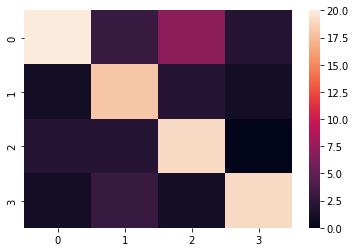

In [120]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Naive Bayes Gender

In [121]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['gender']

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [123]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [124]:
y_pred=model.predict(X_test)
y_pred

array(['male', 'female', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male',
       'male', 'female', 'female', 'female', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'female', 'female',
       'female', 'female', 'female', 'male', 'male', 'female', 'female',
       'female', 'male', 'female', 'female'], dtype='<U6'

In [125]:
y_test.values

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'male', 'female',
       '

In [126]:
accuracy_score(y_test,y_pred)

0.7029702970297029

In [127]:
y_test.value_counts()

male      54
female    47
Name: gender, dtype: int64

In [128]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       0.71      0.62      0.66        47
        male       0.70      0.78      0.74        54

    accuracy                           0.70       101
   macro avg       0.70      0.70      0.70       101
weighted avg       0.70      0.70      0.70       101



In [129]:
confusion_matrix(y_test,y_pred)

array([[29, 18],
       [12, 42]])

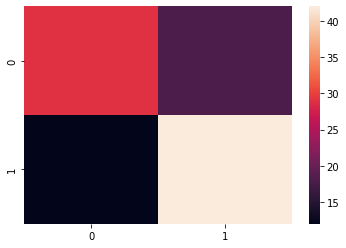

In [130]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Decision Tree Person Identifier


In [146]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['label']

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [148]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
y_pred=model.predict(X_test)
y_pred

array([  6, 114,   4,  99,  83,  47,  13, 115, 112,  43,  14,  25,  42,
        29,  28, 103,  40,  83,  49,  26,  53,  57,  35,  43, 132,  83,
        67,   8,  74,  25,  90,  29,  51,  51, 105,  33,  47,  73,  43,
         6,  13,  40, 104,  46,  24,  42,   9,  22, 113,  38, 115,  43,
        70,  73,  76,  31, 119,  34,  88,  53,  60,  67,  70,  86, 106,
       112,  41, 104,  12,  26,  95, 132, 123, 115,  26,  10,  86,  38,
       126,  10,  35, 125,  69,  64,  29,  12,  86,  52,  98,  13,  70,
       112,  78,  83,  96,  93,  35, 125, 115,  70,  97])

In [150]:
y_test.values

array([ 23,  25, 122,  88, 101,   3,  82, 107,  41,  39, 111,  64,  65,
        56,  44,  76, 128,  50,  40,   9,  53,  99, 118,  28,  11, 103,
         5,  96,  25,  60, 100,  30,  32, 134,  52,  93,  80, 116,  68,
        49,  82,  11, 104,  57,  20,   0, 117,  90, 108,  26,  94,  44,
        56,  37,  34,   3,  85,  44,  94,  72,  20,  71, 100, 110,  77,
        62,   2, 104, 111,  19,  37,  16,  88,  87,  45,  59, 121,  26,
       131,  54,  77,  61,  56,  97,  83,  85, 109,  40,  79,  13,  98,
       104,  78, 116,  46, 106,  14, 114,  15, 131,  27])

In [151]:
accuracy_score(y_test,y_pred)

0.04950495049504951

In [152]:
y_pred

array([  6, 114,   4,  99,  83,  47,  13, 115, 112,  43,  14,  25,  42,
        29,  28, 103,  40,  83,  49,  26,  53,  57,  35,  43, 132,  83,
        67,   8,  74,  25,  90,  29,  51,  51, 105,  33,  47,  73,  43,
         6,  13,  40, 104,  46,  24,  42,   9,  22, 113,  38, 115,  43,
        70,  73,  76,  31, 119,  34,  88,  53,  60,  67,  70,  86, 106,
       112,  41, 104,  12,  26,  95, 132, 123, 115,  26,  10,  86,  38,
       126,  10,  35, 125,  69,  64,  29,  12,  86,  52,  98,  13,  70,
       112,  78,  83,  96,  93,  35, 125, 115,  70,  97])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [154]:
y_test.value_counts()

104    3
44     3
56     3
37     2
20     2
      ..
49     1
57     1
0      1
117    1
27     1
Name: label, Length: 79, dtype: int64

In [155]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

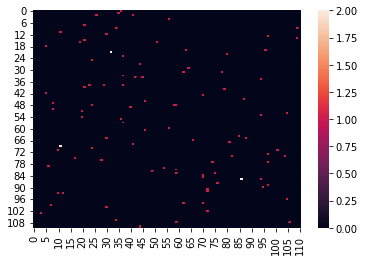

In [156]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Decision Tree Expression

In [158]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['expression']

In [159]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [160]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [161]:
y_pred=model.predict(X_test)
y_pred

array(['neutral', 'smiling', 'anger', 'anger', 'left_light', 'left_light',
       'anger', 'left_light', 'smiling', 'left_light', 'left_light',
       'neutral', 'left_light', 'smiling', 'left_light', 'neutral',
       'anger', 'anger', 'smiling', 'smiling', 'neutral', 'smiling',
       'anger', 'neutral', 'smiling', 'neutral', 'smiling', 'left_light',
       'neutral', 'neutral', 'left_light', 'neutral', 'anger', 'neutral',
       'left_light', 'smiling', 'smiling', 'smiling', 'smiling',
       'smiling', 'anger', 'anger', 'anger', 'left_light', 'neutral',
       'neutral', 'left_light', 'left_light', 'smiling', 'anger', 'anger',
       'smiling', 'anger', 'left_light', 'smiling', 'neutral', 'anger',
       'left_light', 'neutral', 'neutral', 'anger', 'neutral', 'anger',
       'smiling', 'neutral', 'smiling', 'anger', 'left_light', 'anger',
       'left_light', 'neutral', 'left_light', 'left_light', 'neutral',
       'left_light', 'neutral', 'smiling', 'neutral', 'left_light',
      

In [162]:
y_test.values

array(['anger', 'smiling', 'anger', 'neutral', 'left_light', 'left_light',
       'anger', 'neutral', 'smiling', 'left_light', 'left_light',
       'left_light', 'neutral', 'smiling', 'smiling', 'anger', 'anger',
       'neutral', 'neutral', 'smiling', 'anger', 'smiling', 'anger',
       'neutral', 'smiling', 'anger', 'smiling', 'left_light', 'neutral',
       'anger', 'left_light', 'anger', 'neutral', 'anger', 'left_light',
       'anger', 'smiling', 'smiling', 'anger', 'smiling', 'left_light',
       'anger', 'anger', 'anger', 'neutral', 'smiling', 'smiling',
       'left_light', 'smiling', 'anger', 'anger', 'neutral', 'anger',
       'anger', 'anger', 'neutral', 'anger', 'left_light', 'smiling',
       'neutral', 'anger', 'neutral', 'anger', 'smiling', 'left_light',
       'left_light', 'anger', 'left_light', 'anger', 'left_light',
       'neutral', 'smiling', 'left_light', 'neutral', 'smiling',
       'neutral', 'smiling', 'neutral', 'left_light', 'neutral', 'anger',
       'neutra

In [163]:
accuracy_score(y_test,y_pred)

0.6435643564356436

In [164]:
y_test.value_counts()

anger         32
smiling       24
neutral       23
left_light    22
Name: expression, dtype: int64

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.76      0.59      0.67        32
  left_light       0.63      0.77      0.69        22
     neutral       0.50      0.52      0.51        23
     smiling       0.68      0.71      0.69        24

    accuracy                           0.64       101
   macro avg       0.64      0.65      0.64       101
weighted avg       0.65      0.64      0.64       101



In [166]:
confusion_matrix(y_test,y_pred)

array([[19,  2,  8,  3],
       [ 2, 17,  2,  1],
       [ 4,  3, 12,  4],
       [ 0,  5,  2, 17]])

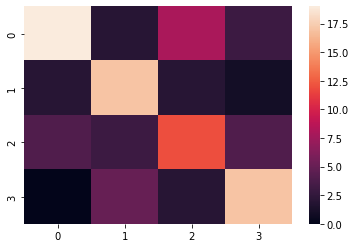

In [167]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Decision Tree Gender

In [168]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['gender']

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [170]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [171]:
y_pred=model.predict(X_test)
y_pred

array(['male', 'male', 'male', 'female', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'male', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'female', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'female', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'male', 'male', 'female', 'female', 'female', 'female', 'female',
       'male', 'female', 'male', 'female', 'male'], dtype=object)

In [172]:
y_test.values

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'male', 'female',
       '

In [173]:
accuracy_score(y_test,y_pred)

0.6435643564356436

In [174]:
y_test.value_counts()

male      54
female    47
Name: gender, dtype: int64

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       0.64      0.53      0.58        47
        male       0.65      0.74      0.69        54

    accuracy                           0.64       101
   macro avg       0.64      0.64      0.64       101
weighted avg       0.64      0.64      0.64       101



In [176]:
confusion_matrix(y_test,y_pred)

array([[25, 22],
       [14, 40]])

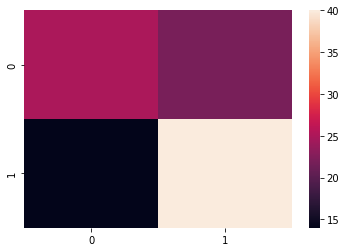

In [177]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Support Vector Machine Person Identifier

In [178]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['label']

In [179]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [180]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [181]:
y_pred=model.predict(X_test)
y_pred

array([ 55, 112, 112, 115,  91, 115,  22, 115,   7,   1, 112, 115,  42,
       112, 112,  91,  63,   1,  58, 112, 112,  91, 115, 115,  22, 115,
        92,  22,  63, 115, 112,  63,  63,  63, 115,  89,  22, 112,  89,
       112,  22, 112,  22, 112,  63,  92, 112,  22,  92,  91,  67,  63,
         1, 115, 115,  58,  63,  67,  67,  63,  63,  67, 112, 112,   1,
       112,  63,  22,  55, 112,  63,  22,  91,  67,  22,   1,  63, 112,
        91, 115,  67, 115,  89,  91,  63,  22,  67,  58, 112,  91,  22,
       112,  89,  91,  55,  89, 115,  89,  58, 112,  91])

In [182]:
y_test.values

array([ 23,  25, 122,  88, 101,   3,  82, 107,  41,  39, 111,  64,  65,
        56,  44,  76, 128,  50,  40,   9,  53,  99, 118,  28,  11, 103,
         5,  96,  25,  60, 100,  30,  32, 134,  52,  93,  80, 116,  68,
        49,  82,  11, 104,  57,  20,   0, 117,  90, 108,  26,  94,  44,
        56,  37,  34,   3,  85,  44,  94,  72,  20,  71, 100, 110,  77,
        62,   2, 104, 111,  19,  37,  16,  88,  87,  45,  59, 121,  26,
       131,  54,  77,  61,  56,  97,  83,  85, 109,  40,  79,  13,  98,
       104,  78, 116,  46, 106,  14, 114,  15, 131,  27])

In [183]:
accuracy_score(y_test,y_pred)

0.0

In [184]:
y_pred

array([ 55, 112, 112, 115,  91, 115,  22, 115,   7,   1, 112, 115,  42,
       112, 112,  91,  63,   1,  58, 112, 112,  91, 115, 115,  22, 115,
        92,  22,  63, 115, 112,  63,  63,  63, 115,  89,  22, 112,  89,
       112,  22, 112,  22, 112,  63,  92, 112,  22,  92,  91,  67,  63,
         1, 115, 115,  58,  63,  67,  67,  63,  63,  67, 112, 112,   1,
       112,  63,  22,  55, 112,  63,  22,  91,  67,  22,   1,  63, 112,
        91, 115,  67, 115,  89,  91,  63,  22,  67,  58, 112,  91,  22,
       112,  89,  91,  55,  89, 115,  89,  58, 112,  91])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [186]:
y_test.value_counts()

104    3
44     3
56     3
37     2
20     2
      ..
49     1
57     1
0      1
117    1
27     1
Name: label, Length: 79, dtype: int64

In [187]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

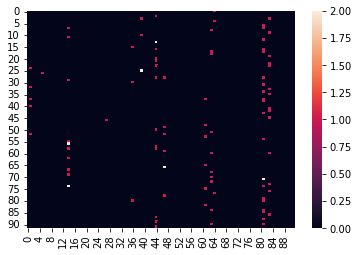

In [188]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Support Vector Machine Expression

In [189]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['expression']

In [190]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [191]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [192]:
y_pred=model.predict(X_test)
y_pred

array(['anger', 'left_light', 'left_light', 'anger', 'left_light',
       'anger', 'left_light', 'anger', 'left_light', 'left_light',
       'left_light', 'anger', 'neutral', 'left_light', 'left_light',
       'left_light', 'neutral', 'left_light', 'neutral', 'left_light',
       'left_light', 'left_light', 'neutral', 'neutral', 'left_light',
       'neutral', 'left_light', 'left_light', 'neutral', 'anger',
       'left_light', 'neutral', 'neutral', 'neutral', 'neutral',
       'left_light', 'left_light', 'left_light', 'left_light',
       'left_light', 'left_light', 'left_light', 'left_light',
       'left_light', 'neutral', 'left_light', 'left_light', 'left_light',
       'left_light', 'left_light', 'left_light', 'neutral', 'left_light',
       'anger', 'neutral', 'neutral', 'neutral', 'left_light',
       'left_light', 'neutral', 'neutral', 'left_light', 'left_light',
       'left_light', 'left_light', 'left_light', 'neutral', 'left_light',
       'anger', 'left_light', 'neutral', '

In [193]:
y_test.values

array(['anger', 'smiling', 'anger', 'neutral', 'left_light', 'left_light',
       'anger', 'neutral', 'smiling', 'left_light', 'left_light',
       'left_light', 'neutral', 'smiling', 'smiling', 'anger', 'anger',
       'neutral', 'neutral', 'smiling', 'anger', 'smiling', 'anger',
       'neutral', 'smiling', 'anger', 'smiling', 'left_light', 'neutral',
       'anger', 'left_light', 'anger', 'neutral', 'anger', 'left_light',
       'anger', 'smiling', 'smiling', 'anger', 'smiling', 'left_light',
       'anger', 'anger', 'anger', 'neutral', 'smiling', 'smiling',
       'left_light', 'smiling', 'anger', 'anger', 'neutral', 'anger',
       'anger', 'anger', 'neutral', 'anger', 'left_light', 'smiling',
       'neutral', 'anger', 'neutral', 'anger', 'smiling', 'left_light',
       'left_light', 'anger', 'left_light', 'anger', 'left_light',
       'neutral', 'smiling', 'left_light', 'neutral', 'smiling',
       'neutral', 'smiling', 'neutral', 'left_light', 'neutral', 'anger',
       'neutra

In [194]:
accuracy_score(y_test,y_pred)

0.3465346534653465

In [195]:
y_test.value_counts()

anger         32
smiling       24
neutral       23
left_light    22
Name: expression, dtype: int64

In [196]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.38      0.16      0.22        32
  left_light       0.29      0.82      0.42        22
     neutral       0.48      0.52      0.50        23
     smiling       0.00      0.00      0.00        24

    accuracy                           0.35       101
   macro avg       0.29      0.37      0.29       101
weighted avg       0.29      0.35      0.28       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [197]:
confusion_matrix(y_test,y_pred)

array([[ 5, 17, 10,  0],
       [ 2, 18,  2,  0],
       [ 5,  6, 12,  0],
       [ 1, 22,  1,  0]])

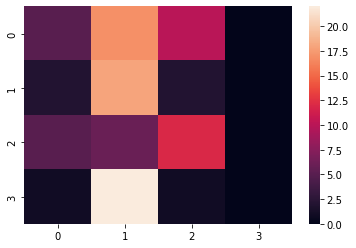

In [198]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# Support Vector Machine Gender

In [199]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['gender']

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [207]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [209]:
y_pred=model.predict(X_test)
y_pred

array(['male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male'], dtype=object)

In [210]:
y_test.values

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'male', 'female',
       '

In [211]:
accuracy_score(y_test,y_pred)

0.5346534653465347

In [212]:
y_test.value_counts()

male      54
female    47
Name: gender, dtype: int64

In [213]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       0.00      0.00      0.00        47
        male       0.53      1.00      0.70        54

    accuracy                           0.53       101
   macro avg       0.27      0.50      0.35       101
weighted avg       0.29      0.53      0.37       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
confusion_matrix(y_test,y_pred)

array([[ 0, 47],
       [ 0, 54]])

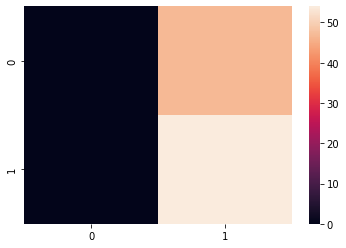

In [215]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# ANN Person Identifier

In [216]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['label']

In [217]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [218]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(100))
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=100)

In [220]:
y_pred=model.predict(X_test)
y_pred

array([ 47,  47,  47,  47,   7,  47, 109,  47,  47,  47,  47,  47,  42,
        47,  47,   7,  47,  47,  47,  47,  47,  47,  47,  47,   7,  47,
        47, 109,  47,  47,  47,  47,  47,  47,  47,  47,   7,  47,  47,
        47, 109,  47,   7,  47,  47,  47,  47, 109,  47,   7,  47,  47,
        47,  47,  47,  42,  47,  47,  47,  47,  47,  47,  47,  47,  47,
        47,  47,   7,  47,  47,  47,   7,   7,  47,   7,  47,  47,  47,
         7,  47,  47,  47,  47,   7,  47,   7,  47,  47,  47,   7,   7,
         7,  47,   7,  47,  47,  47,  47,  42,  47,   7])

In [221]:
y_test.values

array([ 23,  25, 122,  88, 101,   3,  82, 107,  41,  39, 111,  64,  65,
        56,  44,  76, 128,  50,  40,   9,  53,  99, 118,  28,  11, 103,
         5,  96,  25,  60, 100,  30,  32, 134,  52,  93,  80, 116,  68,
        49,  82,  11, 104,  57,  20,   0, 117,  90, 108,  26,  94,  44,
        56,  37,  34,   3,  85,  44,  94,  72,  20,  71, 100, 110,  77,
        62,   2, 104, 111,  19,  37,  16,  88,  87,  45,  59, 121,  26,
       131,  54,  77,  61,  56,  97,  83,  85, 109,  40,  79,  13,  98,
       104,  78, 116,  46, 106,  14, 114,  15, 131,  27])

In [222]:
accuracy_score(y_test,y_pred)

0.0

In [223]:
y_pred

array([ 47,  47,  47,  47,   7,  47, 109,  47,  47,  47,  47,  47,  42,
        47,  47,   7,  47,  47,  47,  47,  47,  47,  47,  47,   7,  47,
        47, 109,  47,  47,  47,  47,  47,  47,  47,  47,   7,  47,  47,
        47, 109,  47,   7,  47,  47,  47,  47, 109,  47,   7,  47,  47,
        47,  47,  47,  42,  47,  47,  47,  47,  47,  47,  47,  47,  47,
        47,  47,   7,  47,  47,  47,   7,   7,  47,   7,  47,  47,  47,
         7,  47,  47,  47,  47,   7,  47,   7,  47,  47,  47,   7,   7,
         7,  47,   7,  47,  47,  47,  47,  42,  47,   7])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [225]:
y_test.value_counts()

104    3
44     3
56     3
37     2
20     2
      ..
49     1
57     1
0      1
117    1
27     1
Name: label, Length: 79, dtype: int64

In [226]:
confusion_matrix(y_test,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

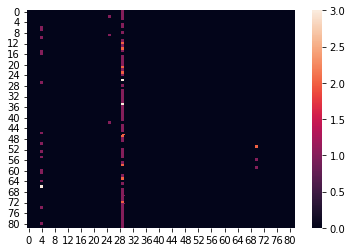

In [227]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# ANN Expression

In [228]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['expression']

In [229]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [232]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(100))
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=100)

In [233]:
y_pred=model.predict(X_test)
y_pred

array(['neutral', 'smiling', 'smiling', 'neutral', 'smiling', 'neutral',
       'smiling', 'neutral', 'smiling', 'left_light', 'smiling',
       'neutral', 'neutral', 'smiling', 'smiling', 'smiling', 'neutral',
       'left_light', 'neutral', 'smiling', 'left_light', 'smiling',
       'neutral', 'neutral', 'smiling', 'neutral', 'neutral', 'smiling',
       'neutral', 'neutral', 'smiling', 'neutral', 'neutral', 'neutral',
       'neutral', 'smiling', 'smiling', 'smiling', 'left_light',
       'smiling', 'smiling', 'smiling', 'smiling', 'smiling', 'neutral',
       'left_light', 'smiling', 'smiling', 'smiling', 'smiling',
       'left_light', 'neutral', 'left_light', 'neutral', 'neutral',
       'neutral', 'neutral', 'left_light', 'neutral', 'neutral',
       'neutral', 'neutral', 'smiling', 'smiling', 'left_light',
       'smiling', 'neutral', 'smiling', 'neutral', 'smiling', 'neutral',
       'smiling', 'smiling', 'neutral', 'smiling', 'left_light',
       'neutral', 'smiling', 'smilin

In [234]:
y_test.values

array(['anger', 'smiling', 'anger', 'neutral', 'left_light', 'left_light',
       'anger', 'neutral', 'smiling', 'left_light', 'left_light',
       'left_light', 'neutral', 'smiling', 'smiling', 'anger', 'anger',
       'neutral', 'neutral', 'smiling', 'anger', 'smiling', 'anger',
       'neutral', 'smiling', 'anger', 'smiling', 'left_light', 'neutral',
       'anger', 'left_light', 'anger', 'neutral', 'anger', 'left_light',
       'anger', 'smiling', 'smiling', 'anger', 'smiling', 'left_light',
       'anger', 'anger', 'anger', 'neutral', 'smiling', 'smiling',
       'left_light', 'smiling', 'anger', 'anger', 'neutral', 'anger',
       'anger', 'anger', 'neutral', 'anger', 'left_light', 'smiling',
       'neutral', 'anger', 'neutral', 'anger', 'smiling', 'left_light',
       'left_light', 'anger', 'left_light', 'anger', 'left_light',
       'neutral', 'smiling', 'left_light', 'neutral', 'smiling',
       'neutral', 'smiling', 'neutral', 'left_light', 'neutral', 'anger',
       'neutra

In [235]:
accuracy_score(y_test,y_pred)

0.40594059405940597

In [236]:
y_test.value_counts()

anger         32
smiling       24
neutral       23
left_light    22
Name: expression, dtype: int64

In [237]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        32
  left_light       0.27      0.14      0.18        22
     neutral       0.45      0.83      0.58        23
     smiling       0.40      0.79      0.53        24

    accuracy                           0.41       101
   macro avg       0.28      0.44      0.32       101
weighted avg       0.26      0.41      0.30       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [238]:
confusion_matrix(y_test,y_pred)

array([[ 0,  4, 15, 13],
       [ 0,  3,  4, 15],
       [ 0,  3, 19,  1],
       [ 0,  1,  4, 19]])

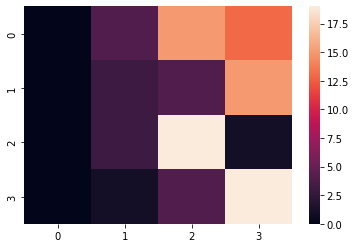

In [239]:
sns.heatmap(confusion_matrix(y_test,y_pred))

# ANN Gender

In [240]:
X= df_red.drop(columns=['gender',	'expression','label'],axis=1)
y= df_red['gender']

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [242]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=(100))
model.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=100)

In [243]:
y_pred=model.predict(X_test)
y_pred

array(['male', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'male'], dtype='<U6')

In [244]:
y_test.values

array(['male', 'male', 'female', 'female', 'female', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'male', 'male', 'female',
       'female', 'male', 'male', 'female', 'male', 'female', 'male',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'female', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'male', 'male', 'female', 'female', 'male', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'male', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'female', 'male', 'female',
       '

In [245]:
accuracy_score(y_test,y_pred)

0.5544554455445545

In [246]:
y_test.value_counts()

male      54
female    47
Name: gender, dtype: int64

In [247]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      female       1.00      0.04      0.08        47
        male       0.55      1.00      0.71        54

    accuracy                           0.55       101
   macro avg       0.77      0.52      0.39       101
weighted avg       0.76      0.55      0.42       101



In [248]:
confusion_matrix(y_test,y_pred)

array([[ 2, 45],
       [ 0, 54]])

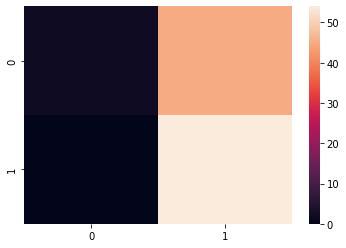

In [249]:
sns.heatmap(confusion_matrix(y_test,y_pred))